<a href="https://colab.research.google.com/github/nareohanyan/ML/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generating some numerical dataset.

Let's generate artificial training examples to use in experiments. To do this, we'll take the function y = 2x + 5 as the true relationship between the feature x and the response y. By adding random noise, we'll generate 50 training examples.

In [1]:
import numpy as np


def f(x):
    return 2 * x + 5

def generate_dataset(count=50, start=100, end=500):
    """Random function for generating some numerical datasets."""
    step = (end - start) / count
    X = []
    y = []

    for i in range(count):
        X.append(start + i * step)
        y.append(f(start + i * step) + np.random.uniform(-100, 100))

    return X, y

In [3]:
X, y = generate_dataset()

Using the pyplot module of the matplotlib library, plot the generated points and the line of the true dependence of y on x on a single graph.

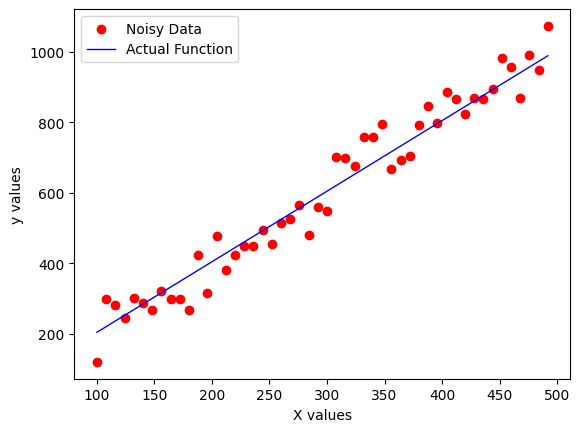

In [5]:
import matplotlib.pyplot as plt

X = np.array(X)

plt.scatter(X, y, color='red', label='Noisy Data')
plt.plot(X, 2*X + 5, color = 'blue', linewidth = 1, label='Actual Function')

plt.xlabel('X values')
plt.ylabel('y values')
plt.legend()
plt.show()

## Gradient Descent

Complete the gd function that implements finding the parameters of linear regression using gradient descent. The parameters x_train and y_train store the feature descriptions and training data responses, respectively, and are lists of numerical values. The parameter k is the number of training iterations, alpha is the learning rate. The function should return two lists: a list of loss function values for each training iteration and a list of final parameter values.

In the implementation, use **mean squared error** as the loss function.

In [16]:
import matplotlib.pyplot as plt

def gd(x_train, y_train, k=1000, alpha=0.00001):

  slope, intercept = 0, 0
  n = len(x_train)
  loss_values = []

  x_train = np.array(x_train)
  y_train = np.array(y_train)

  for _ in range(k):
    y_pred = slope * x_train + intercept
    loss = np.mean((y_pred - y_train) ** 2)
    loss_values.append(loss)

    slope_gradient = 2 * np.mean((y_pred - y_train) * x_train)
    intercept_gradient = 2 * np.mean(y_pred - y_train)

    slope -= alpha * slope_gradient
    intercept -= alpha * intercept_gradient

  return loss_values, [slope, intercept]

## Stochastic Gradient Descent

Complete the sgd function that implements finding the parameters of linear regression using stochastic gradient descent. The parameters x_train and y_train store the feature descriptions and training data responses, respectively, and are lists of numerical values. The parameter k is the number of training iterations, alpha is the learning rate. The function should return two lists: a list of loss function values for each training iteration and a list of final parameter values.

In the implementation, use **mean absolute error** as the loss function.

In [17]:
def sgd(x_train, y_train, k=1000, alpha=0.00001):
  slope, intercept = 0, 0
  n = len(x_train)
  loss_values = []

  for _ in range(k):
    i = np.random.randint(n)
    y_pred = slope * x_train[i] + intercept
    loss = np.abs(y_pred - y_train[i])
    loss_values.append(loss)

    slope_gradient = -x_train[i] * (y_train[i] - y_pred)
    intercept_gradient = -(y_train[i] - y_pred)

    slope -= alpha * slope_gradient
    intercept -= alpha * intercept

  return loss_values, [slope, intercept]

# Visualize loss function values using matplotlib

Plot and compare the graphs of the loss function values against the number of training iterations for both gradient descent (gd) and stochastic gradient descent (sgd).

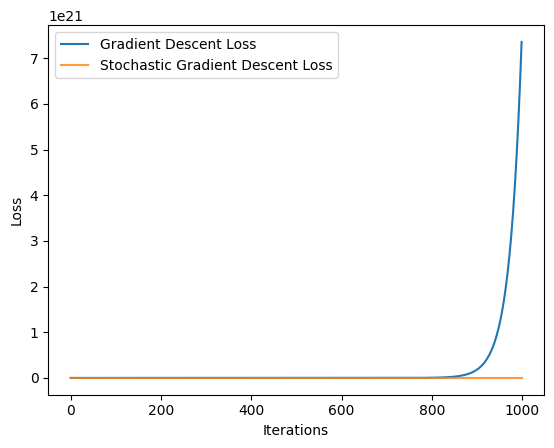

In [18]:
loss_gd, params_gd = gd(X, y)
loss_sgd, params_sgd = sgd(X, y)

plt.plot(loss_gd, label="Gradient Descent Loss")
plt.plot(loss_sgd, label="Stochastic Gradient Descent Loss", alpha=0.8)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

